In [1]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import datetime

In [2]:
start_date = datetime(2017, 1, 1)
end_date = datetime(2019, 6, 15)

google = web.DataReader('GOOG', 'iex', start_date, end_date)
google.head()

,open,high,low,close,volume
date,,,,,
2017-01-03,778.81,789.6300,775.8000,786.14,1657268
2017-01-04,788.36,791.3400,783.1600,786.90,1072958
2017-01-05,786.08,794.4800,785.0200,794.02,1335167
2017-01-06,795.26,807.9000,792.2041,806.15,1640170
2017-01-09,806.40,809.9664,802.8300,806.65,1274645


In [3]:
google.describe()

,open,high,low,close,volume
count,615.000000,615.000000,615.000000,615.000000,6.150000e+02
mean,1039.989626,1049.166330,1030.775960,1040.442699,1.592419e+06
std,121.557621,123.363289,119.667553,121.540149,7.001719e+05
min,778.810000,789.630000,775.800000,786.140000,5.369960e+05
25%,942.175000,950.295000,935.390000,944.160000,1.168257e+06
50%,1052.000000,1064.350000,1041.260000,1053.050000,1.401404e+06
75%,1132.170000,1143.455000,1121.375000,1134.470000,1.829930e+06
max,1274.000000,1289.270000,1266.290000,1287.580000,6.207027e+06


In [4]:
google_prices = google['close']
moving_avg_100 = google_prices.rolling(window=100).mean()
moving_avg_200 = google_prices.rolling(window=200).mean()
moving_avg_50 = google_prices.rolling(window=50).mean()

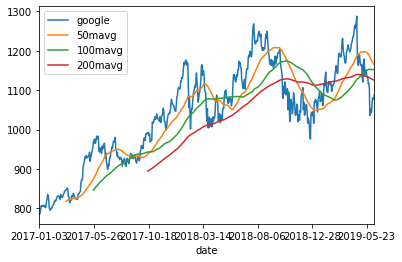

In [5]:
google_prices.plot(label='google')
moving_avg_50.plot(label='50mavg')
moving_avg_100.plot(label='100mavg')
moving_avg_200.plot(label='200mavg')
plt.legend()

In [6]:
predict_start_date = datetime(2019, 6, 15)
predict_end_date = datetime(2019, 6, 30)

In [7]:
datelist = pd.date_range(start=predict_start_date,end=predict_end_date)
datelist = [datetime.date(date) for date in datelist]
predict_google = pd.DataFrame(index=datelist,columns=google.columns)
predict_google

,open,high,low,close,volume
2019-06-15,NaN,NaN,NaN,NaN,NaN
2019-06-16,NaN,NaN,NaN,NaN,NaN
2019-06-17,NaN,NaN,NaN,NaN,NaN
2019-06-18,NaN,NaN,NaN,NaN,NaN
2019-06-19,NaN,NaN,NaN,NaN,NaN
2019-06-20,NaN,NaN,NaN,NaN,NaN
2019-06-21,NaN,NaN,NaN,NaN,NaN
2019-06-22,NaN,NaN,NaN,NaN,NaN
2019-06-23,NaN,NaN,NaN,NaN,NaN
2019-06-24,NaN,NaN,NaN,NaN,NaN


In [8]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(google['close'], order=(0,0,1))

/home/umanchanda/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [9]:
results = model.fit()

In [10]:
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:                  close   No. Observations:                  615
Model:                     ARMA(0, 1)   Log Likelihood               -3445.411
Method:                       css-mle   S.D. of innovations             65.477
Date:                Fri, 14 Jun 2019   AIC                           6896.822
Time:                        02:52:25   BIC                           6910.087
Sample:                             0   HQIC                          6901.980
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1040.2733      5.100    203.971      0.000    1030.277    1050.269
ma.L1.close     0.9332      0.011     84.755      0.000       0.912       0.955
                                    Roots       

In [11]:
predict = results.predict(start=0,end=614)

In [12]:
predict.head()

date
2017-01-03    1040.273262
2017-01-04     913.509906
2017-01-05     956.201726
2017-01-06     919.311153
2017-01-09     950.387339
dtype: float64

In [13]:
google_prices.head()

date
2017-01-03    786.14
2017-01-04    786.90
2017-01-05    794.02
2017-01-06    806.15
2017-01-09    806.65
Name: close, dtype: float64

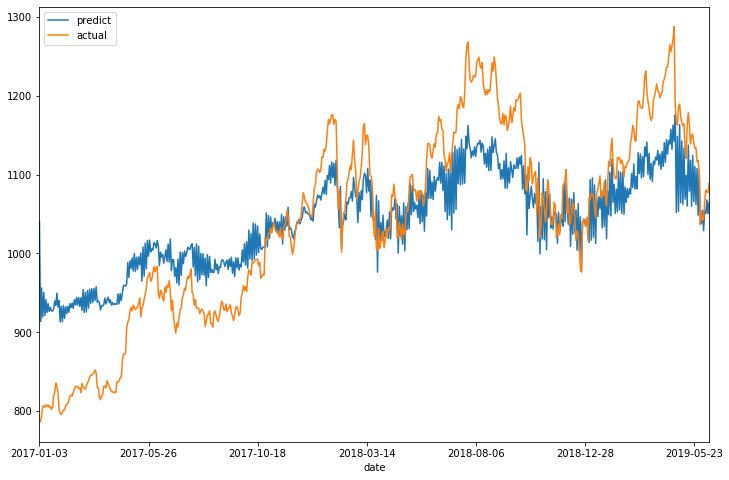

In [14]:
predict.plot(figsize=(12,8),label='predict')
google_prices.plot(figsize=(12,8),label='actual')
plt.legend()